In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [10]:
data1=pd.read_table('C:\\Users\\habib\\OneDrive\\Desktop\\ML\\Datasets\\P176.txt')

In [11]:
data1.head()

,X,Y
0,294,30
1,247,32
2,267,37
3,358,44
4,423,47


In [12]:
X=data1['X']
Y=data1['Y']

In [13]:
# Converting X into numpy array
X=np.array(X).reshape(-1,1)

In [14]:
X.shape

(27, 1)

In [15]:
# Converting Y into numpy array
Y=np.array(Y).reshape(-1,1)

In [16]:
Y.shape

(27, 1)

In [17]:
lin_reg=LinearRegression()  # Creating onject of linear Regression model 
lin_reg.fit(X,Y) # Fitting the Dataset


LinearRegression()

In [18]:
lin_reg.coef_

array([[0.10536109]])

In [19]:
lin_reg.intercept_

array([14.44805858])

# Linear Regression equation is  Y=14.44+0.1053*X

In [21]:
lin_reg.predict([[250],[1200]])

array([[ 40.78833197],
       [140.88137087]])

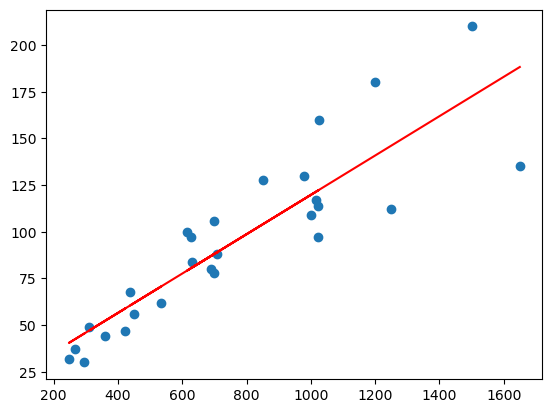

In [22]:
plt.scatter(X,Y)
plt.plot(X,lin_reg.predict(X),color='red')

In [23]:
Y_predict = lin_reg.predict(X)
print(mean_squared_error(Y,Y_predict))

437.1875558036931


# Using Ordinary List Square Method


#B0 = 1/n SUM y; Sum XiYi/1/n(SumXi)sq - Sum Xisq
# we will calculate parameters Beta0,Beta1 of Simple Linear Regression Using The Formulae

In [38]:
X.shape[0]

27

In [39]:
np.sum(X)

20500

In [42]:
n = len(X)

In [46]:
B1 = (1/n*np.sum(X)*np.sum(Y) - np.sum(np.multiply(X,Y))) / (1/n*np.sum(X)**2-np.sum(X**2))

In [48]:
print(B1)

0.10536109357806464


In [50]:
B0 = (1/n*np.sum(Y)) - B1/n*np.sum(X)

In [52]:
print(B0)

14.44805857961758


In [54]:
LR_X=pd.read_csv('C:\\Users\\habib\\OneDrive\\Desktop\\ML\\Datasets\\LR_X.csv')
LR_Y=pd.read_csv('C:\\Users\\habib\\OneDrive\\Desktop\\ML\\Datasets\\LR_Y.csv')

In [56]:
LR_X

,X1,X2,X3
0,0.26,0.08,0.28
1,0.26,0.52,0.01
2,0.85,0.60,0.14
3,0.94,0.22,0.48
4,0.53,0.05,0.76
...,...,...,...
995,0.78,0.41,0.60
996,0.76,0.71,0.86
997,0.88,0.06,0.33
998,0.28,0.40,0.41


In [58]:
LR_Y

,Y
0,1.472
1,1.802
2,1.548
3,1.390
4,2.141
...,...
995,2.245
996,3.471
997,0.796
998,2.406


Linear Regression equation is Y = 1.0 -1.2X1 + 2.1X2+2.2*X3

In [61]:
lin_reg=LinearRegression()
lin_reg.fit(LR_X,LR_Y) 

LinearRegression()

In [63]:
lin_reg.coef_

array([[-1.2,  2.1,  2.2]])

In [65]:
lin_reg.intercept_

array([1.])

In [67]:
# Converting X into numpy array# Converting Y into numpy array
Y=np.array(LR_Y)
X=np.array(LR_X)

In [69]:
X.shape

(1000, 3)

In [71]:
Y.shape

(1000, 1)

In [73]:
XT = np.transpose(X)

In [75]:
ones = np.ones((1000,1))

In [77]:
new_X = np.concatenate((ones,X), axis = 1)

In [79]:
a = np.linalg.inv(np.dot(np.transpose(new_X),new_X))

In [81]:
b = np.dot(np.transpose(new_X), Y)

In [83]:
B = np.dot(a,b)
print(B)

[[ 1. ]
 [-1.2]
 [ 2.1]
 [ 2.2]]


Gradient Descent Algoritihm

In [86]:
data1=pd.read_table('C:\\Users\\habib\\OneDrive\\Desktop\\ML\\Datasets\\P176.txt')

# Seperate dataset as input X and output Y

In [102]:
X=data1['X']
Y=data1['Y']
X=np.array(X).reshape(-1,1) # reshaping in 2D
Y=np.array(Y).reshape(-1,1)

# Scale the data. Scaling is important for Gradient Descent

In [92]:
scalerx = MinMaxScaler()
X=scalerx.fit_transform(X)
scalery = MinMaxScaler()
Y=scalery.fit_transform(Y)

In [94]:
def gradient_descent(X,Y,epochs=1000,lr=0.001):
    plt.scatter(X,Y)
    m=0
    c=0
    n=X.shape[0]
    for i in range(epochs):
        delta_m=(-2/n)*sum(X*(Y-m*X-c))
        delta_c=(-2/n)*sum(Y-m*X-c)
        m=m-lr*delta_m
        c=c-lr*delta_c
        pred=m*X+c
        plt.plot(X,pred)
    return m,c

In [96]:
def predict(m,c,x):
    y=m*x+c
    return y

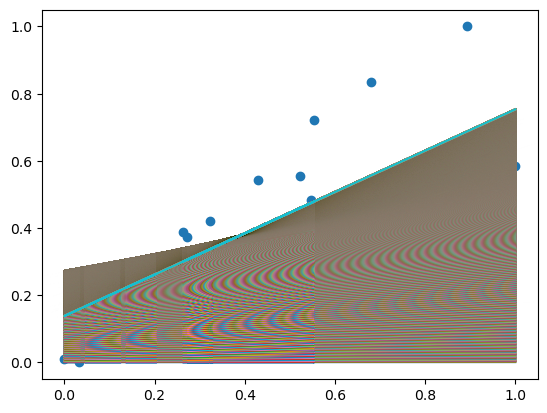

In [98]:
m,c=gradient_descent(X,Y,epochs=10000,lr=0.001)

In [135]:
# After Reshaping this step
x1=(X-np.mean(X))/np.std(X)
y1=(Y-np.mean(Y))/np.std(Y)

In [145]:
def grad_beta(beta0,beta1,x1,y1):
    n=len(x1)
    res=0
    for i in range(n):
        res+=(y1[i]-beta0-beta1*x1[i])
    grad_b0=-2/float(n)*res
    return grad_b0
        

In [153]:
def grad_beta1(beta0,beta1,x1,y1):
    n=len(x1)
    res=0
    for i in range(n):
        res+=(y1[i]-beta0-beta1*x1[i]) * x1[i]
    grad_b0=-2/float(n)*res 
    return grad_b0
    

In [163]:
def gradient_descent(x,y):
    beta0=0
    beta1=0
    lr=0.1
    epochs=1
    while epochs<=100:
        up_b0=grad_beta(beta0,beta1,x1,y1)
        up_b1=grad_beta1(beta0,beta1,x1,y1)
        beta0=beta0-lr*up_b0
        beta1=beta1-lr*up_b1
        y_hat=beta0+beta1*x
        plt.plot(x,y_hat)
        epochs+=1
    return beta0,beta1

[-5.46887638e-17] [0.88083608]


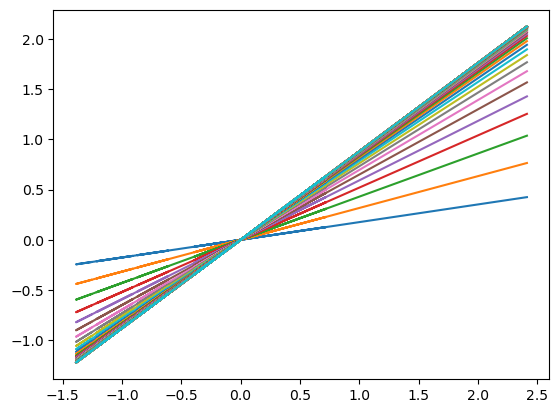

In [165]:
b0,b1=gradient_descent(x1,y1)
print(b0,b1)

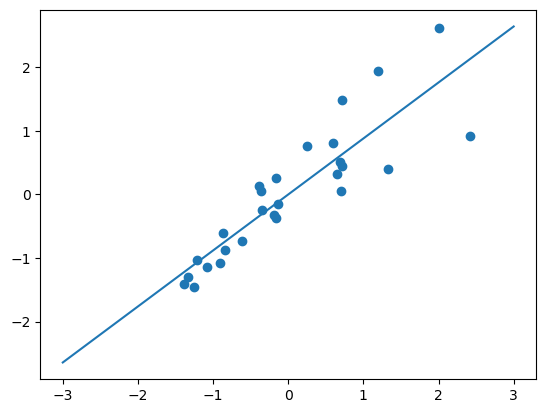

In [182]:
plt.scatter(x1,y1)
x2=np.linspace(-3,3,500)
y2=b0+b1*x2
plt.plot(x2,y2,'-')
plt.show()